# **Домашняя работа 1.** (до 5 ноября)

In [33]:
import nltk
nltk.download('brown')
from nltk.corpus import brown
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import networkx as nx
#from nltk.stem import WordNetLemmatizer 
#lemmatizer = WordNetLemmatizer()
import re
import numpy as np
from scipy.optimize import curve_fit

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\juliakimjk\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


Возьмем пять предложений из корпуса и построим на них граф, окно - 2 (слева два слова и справа два).

In [2]:
sents = brown.sents()[:5]
sents

[['The',
  'Fulton',
  'County',
  'Grand',
  'Jury',
  'said',
  'Friday',
  'an',
  'investigation',
  'of',
  "Atlanta's",
  'recent',
  'primary',
  'election',
  'produced',
  '``',
  'no',
  'evidence',
  "''",
  'that',
  'any',
  'irregularities',
  'took',
  'place',
  '.'],
 ['The',
  'jury',
  'further',
  'said',
  'in',
  'term-end',
  'presentments',
  'that',
  'the',
  'City',
  'Executive',
  'Committee',
  ',',
  'which',
  'had',
  'over-all',
  'charge',
  'of',
  'the',
  'election',
  ',',
  '``',
  'deserves',
  'the',
  'praise',
  'and',
  'thanks',
  'of',
  'the',
  'City',
  'of',
  'Atlanta',
  "''",
  'for',
  'the',
  'manner',
  'in',
  'which',
  'the',
  'election',
  'was',
  'conducted',
  '.'],
 ['The',
  'September-October',
  'term',
  'jury',
  'had',
  'been',
  'charged',
  'by',
  'Fulton',
  'Superior',
  'Court',
  'Judge',
  'Durwood',
  'Pye',
  'to',
  'investigate',
  'reports',
  'of',
  'possible',
  '``',
  'irregularities',
  "''",
 

In [3]:
sentsl = []
for sent in sents:
    sentl = ' '.join(sent)
    sentsl.append(sentl)

Избавляемся от пунктуации

In [4]:
np = []
for sentl in sentsl:
    no_punct = re.sub("[!\#$%&()'*+,./:;<=>?@[\]^_`{|}~„“«»†*—/\-]", ' ', sentl)
    np.append(no_punct)
txt = []
for nnp in np:
    tt = nnp.split()
    txt.append(tt)

In [5]:
txt

[['The',
  'Fulton',
  'County',
  'Grand',
  'Jury',
  'said',
  'Friday',
  'an',
  'investigation',
  'of',
  'Atlanta',
  's',
  'recent',
  'primary',
  'election',
  'produced',
  'no',
  'evidence',
  'that',
  'any',
  'irregularities',
  'took',
  'place'],
 ['The',
  'jury',
  'further',
  'said',
  'in',
  'term',
  'end',
  'presentments',
  'that',
  'the',
  'City',
  'Executive',
  'Committee',
  'which',
  'had',
  'over',
  'all',
  'charge',
  'of',
  'the',
  'election',
  'deserves',
  'the',
  'praise',
  'and',
  'thanks',
  'of',
  'the',
  'City',
  'of',
  'Atlanta',
  'for',
  'the',
  'manner',
  'in',
  'which',
  'the',
  'election',
  'was',
  'conducted'],
 ['The',
  'September',
  'October',
  'term',
  'jury',
  'had',
  'been',
  'charged',
  'by',
  'Fulton',
  'Superior',
  'Court',
  'Judge',
  'Durwood',
  'Pye',
  'to',
  'investigate',
  'reports',
  'of',
  'possible',
  'irregularities',
  'in',
  'the',
  'hard',
  'fought',
  'primary',
  'wh

Разбиваем слова на n-граммы (окно - 5 слов) и составляем пары.

In [6]:
fgrams = []
for tt in txt:
    fivegrams = ngrams(tt,5)
    t1 = tt[0]+ ' '+ tt[1]
    fgrams.append(t1)
    t2 = tt[len(tt)-1]+ ' '+ tt[len(tt)-2]
    fgrams.append(t2)
    for k1, k2, k3, k4, k5 in Counter(fivegrams):
        t3 = k1+' '+ k3
        fgrams.append(t3)
        t4 = k2+' '+ k3
        fgrams.append(t4)
        t5 = k3+' '+ k4
        fgrams.append(t5)
        t6 = k3+' '+ k5
        fgrams.append(t6)

In [7]:
fgrams

['The Fulton',
 'place took',
 'The County',
 'Fulton County',
 'County Grand',
 'County Jury',
 'Fulton Grand',
 'County Grand',
 'Grand Jury',
 'Grand said',
 'County Jury',
 'Grand Jury',
 'Jury said',
 'Jury Friday',
 'Grand said',
 'Jury said',
 'said Friday',
 'said an',
 'Jury Friday',
 'said Friday',
 'Friday an',
 'Friday investigation',
 'said an',
 'Friday an',
 'an investigation',
 'an of',
 'Friday investigation',
 'an investigation',
 'investigation of',
 'investigation Atlanta',
 'an of',
 'investigation of',
 'of Atlanta',
 'of s',
 'investigation Atlanta',
 'of Atlanta',
 'Atlanta s',
 'Atlanta recent',
 'of s',
 'Atlanta s',
 's recent',
 's primary',
 'Atlanta recent',
 's recent',
 'recent primary',
 'recent election',
 's primary',
 'recent primary',
 'primary election',
 'primary produced',
 'recent election',
 'primary election',
 'election produced',
 'election no',
 'primary produced',
 'election produced',
 'produced no',
 'produced evidence',
 'election no',


In [8]:
d = Counter(fgrams)

In [9]:
di = dict(d)

In [10]:
di

{'The Fulton': 1,
 'place took': 1,
 'The County': 1,
 'Fulton County': 1,
 'County Grand': 2,
 'County Jury': 2,
 'Fulton Grand': 1,
 'Grand Jury': 2,
 'Grand said': 2,
 'Jury said': 2,
 'Jury Friday': 2,
 'said Friday': 2,
 'said an': 2,
 'Friday an': 2,
 'Friday investigation': 2,
 'an investigation': 2,
 'an of': 2,
 'investigation of': 2,
 'investigation Atlanta': 2,
 'of Atlanta': 4,
 'of s': 4,
 'Atlanta s': 2,
 'Atlanta recent': 2,
 's recent': 2,
 's primary': 2,
 'recent primary': 2,
 'recent election': 2,
 'primary election': 2,
 'primary produced': 2,
 'election produced': 2,
 'election no': 2,
 'produced no': 2,
 'produced evidence': 2,
 'no evidence': 2,
 'no that': 2,
 'evidence that': 2,
 'evidence any': 2,
 'that any': 2,
 'that irregularities': 2,
 'any irregularities': 2,
 'any took': 1,
 'irregularities took': 1,
 'irregularities place': 1,
 'The jury': 2,
 'conducted was': 1,
 'The further': 1,
 'jury further': 1,
 'further said': 2,
 'further in': 2,
 'jury said':

In [11]:
lk = []
for key, value in di.items():
    s = (key.split()[0], key.split()[1], str(value))
    lk.append(s)

In [240]:
print(lk)

[('The', 'Fulton', '1'), ('place', 'took', '1'), ('The', 'County', '1'), ('Fulton', 'County', '1'), ('County', 'Grand', '2'), ('County', 'Jury', '2'), ('Fulton', 'Grand', '1'), ('Grand', 'Jury', '2'), ('Grand', 'said', '2'), ('Jury', 'said', '2'), ('Jury', 'Friday', '2'), ('said', 'Friday', '2'), ('said', 'investigation', '2'), ('Friday', 'investigation', '2'), ('Friday', 'Atlanta', '2'), ('investigation', 'Atlanta', '2'), ('investigation', 'recent', '2'), ('Atlanta', 'recent', '2'), ('Atlanta', 'primary', '2'), ('recent', 'primary', '2'), ('recent', 'election', '2'), ('primary', 'election', '2'), ('primary', 'produced', '2'), ('election', 'produced', '2'), ('election', 'evidence', '2'), ('produced', 'evidence', '2'), ('produced', 'irregularities', '2'), ('evidence', 'irregularities', '2'), ('evidence', 'took', '1'), ('irregularities', 'took', '1'), ('irregularities', 'place', '1'), ('The', 'jury', '2'), ('conducted', 'election', '1'), ('The', 'said', '2'), ('jury', 'said', '4'), ('sai

Визуализируем

In [12]:
def graph_visualiser(list_of_tuples):
    G = nx.Graph()
    G.add_weighted_edges_from(list_of_tuples)
    plt.figure(num=1, figsize=(100,70))
    nx.draw(G,
        node_color='y',
        node_size=15000,
        node_shape='o',
        with_labels=True,
        font_size=70,
        font_family='DejaVu Sans')
    plt.savefig('g.svg')
    plt.show()

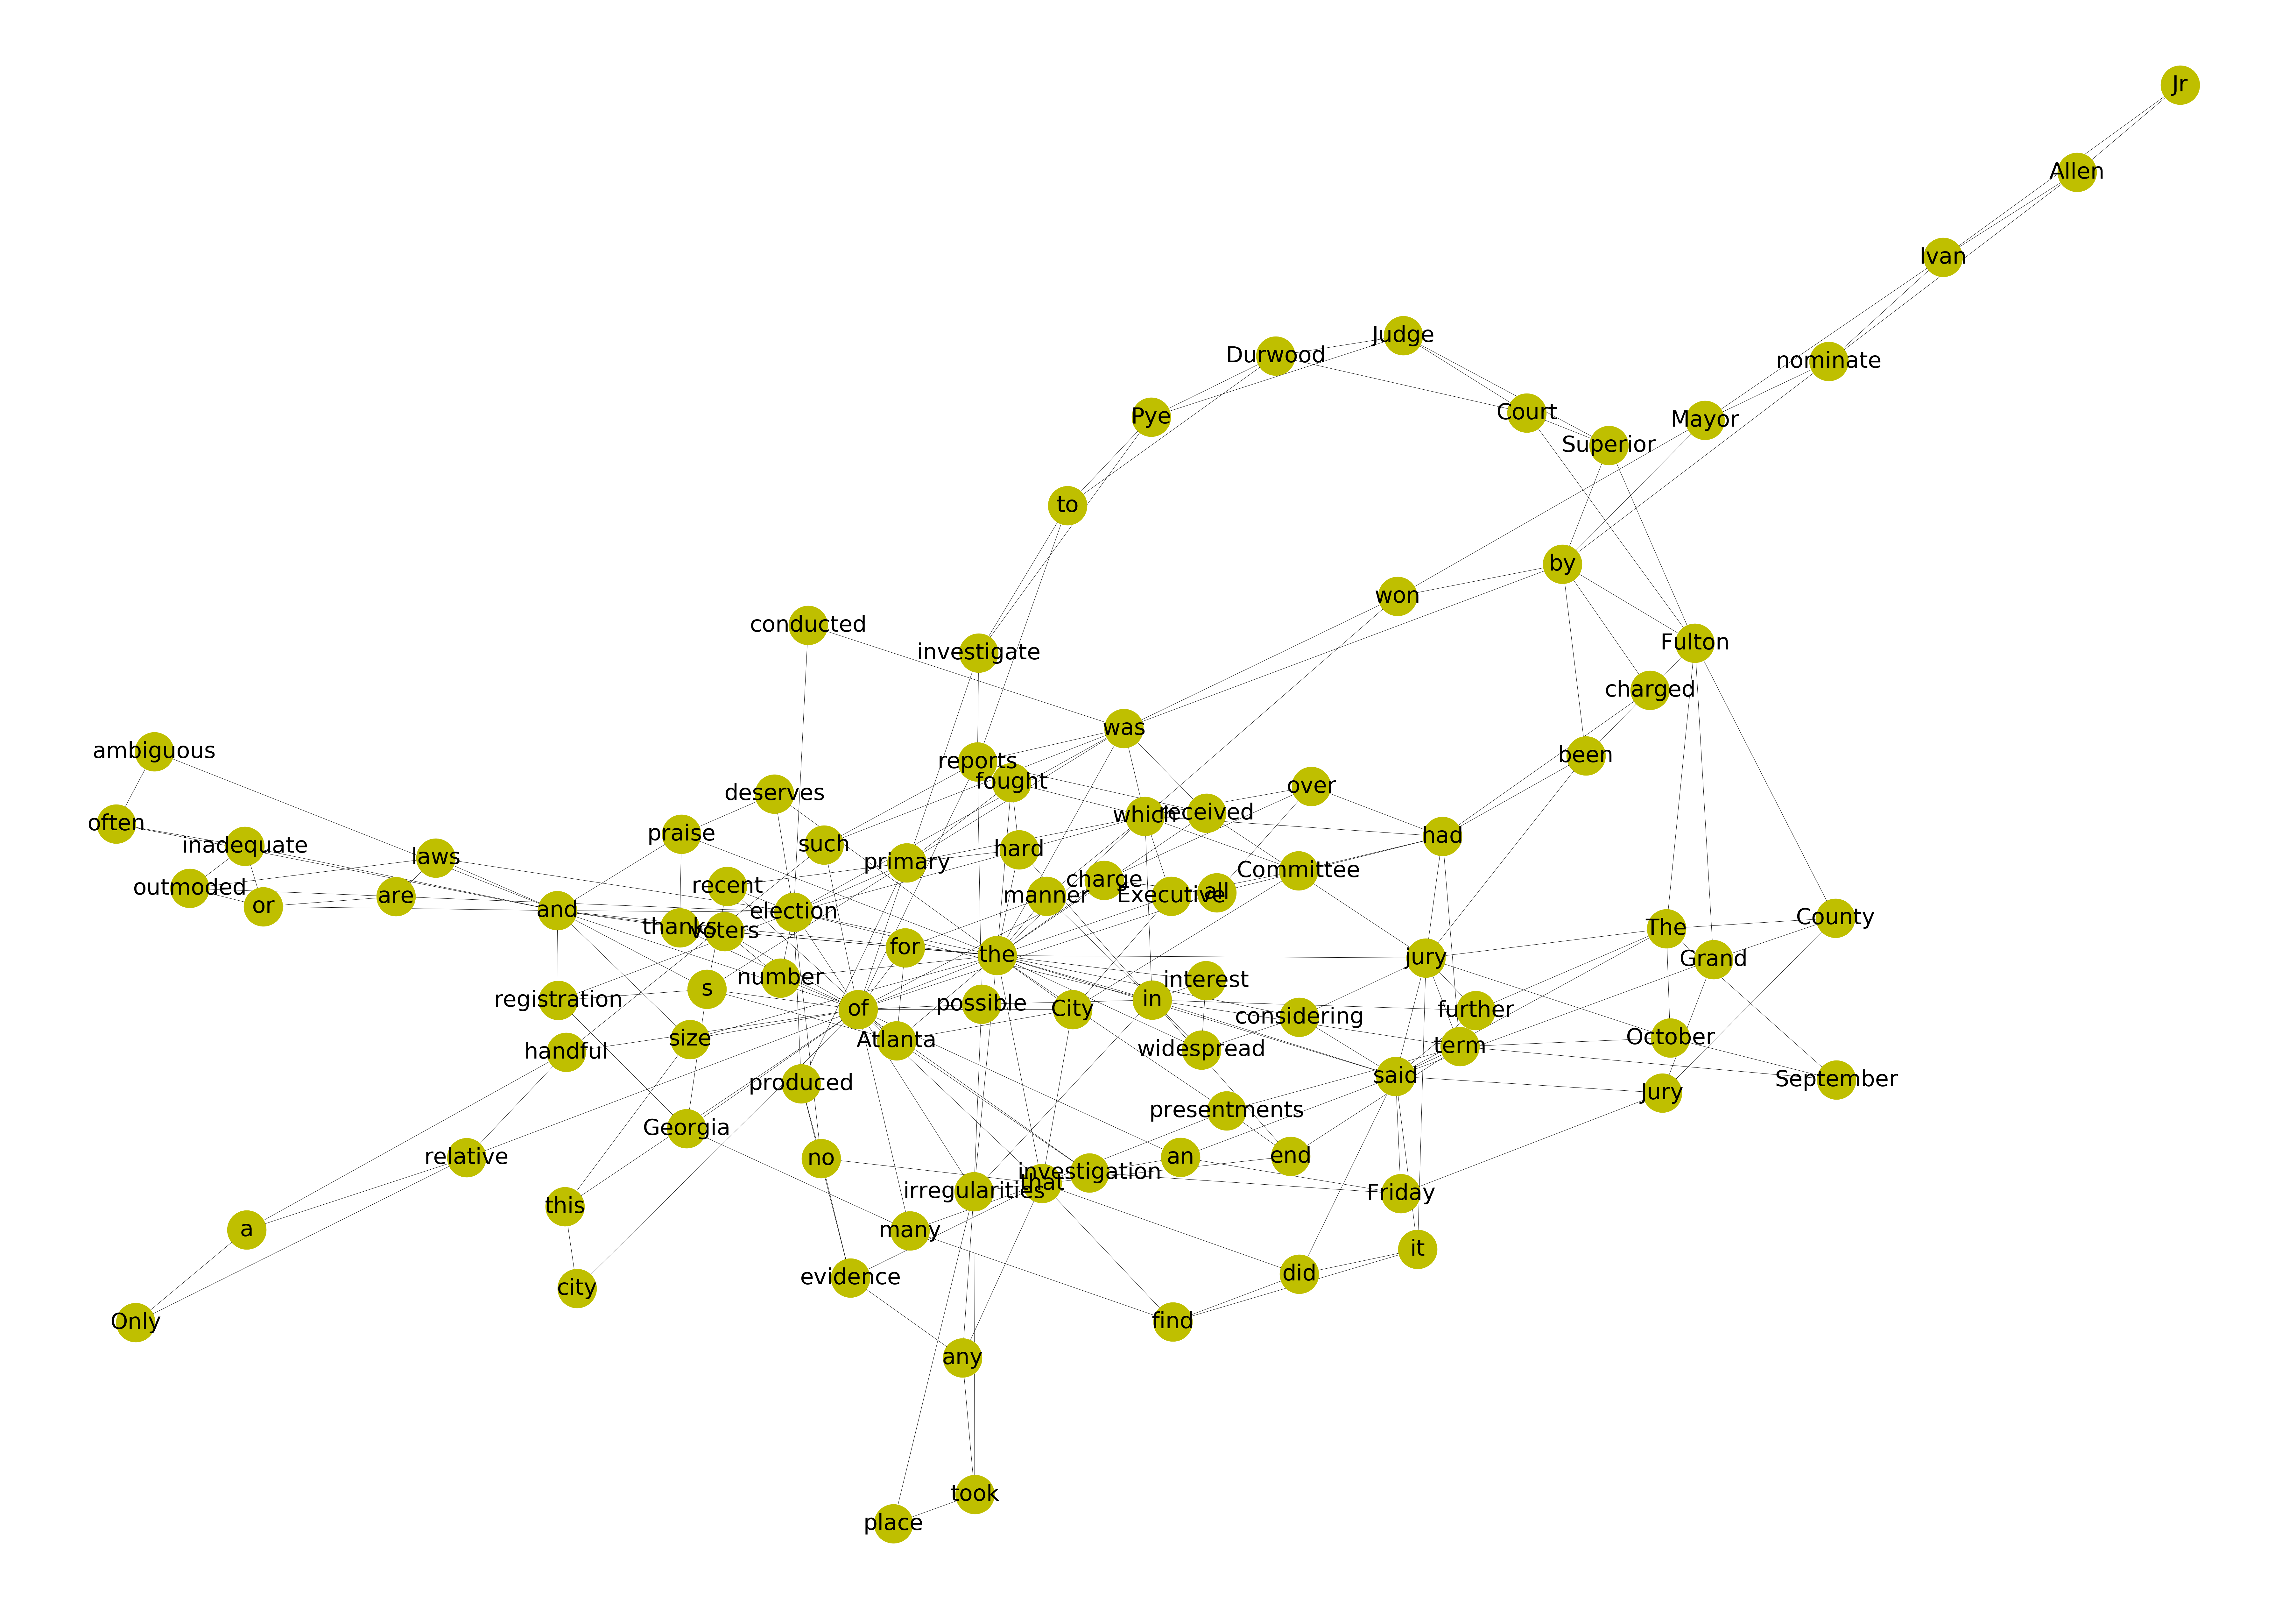

In [15]:
graph_visualiser(lk)

## Descriptive analysis

In [16]:
G = nx.Graph()
G.add_weighted_edges_from(lk)

In [17]:
print('Кол-во вершин', '-', G.number_of_nodes())

Кол-во вершин - 95


In [18]:
print('Кол-во ребер', '-', G.number_of_edges())

Кол-во ребер - 258


In [19]:
print('Плотность - ', nx.density(G))

Плотность -  0.057782754759238525


Средняя степень узла

In [20]:
nodes_d = []
for node in G.nodes():
    dg = G.degree(node)
    nodes_d.append(dg)

In [21]:
print('Средняя степень узла - ', sum(nodes_d)/95)

Средняя степень узла -  5.431578947368421


Распределение степеней вершин

In [22]:
dgg = dict(Counter(nodes_d))

In [31]:
x = list(dgg.keys())
y = list(dgg.values())

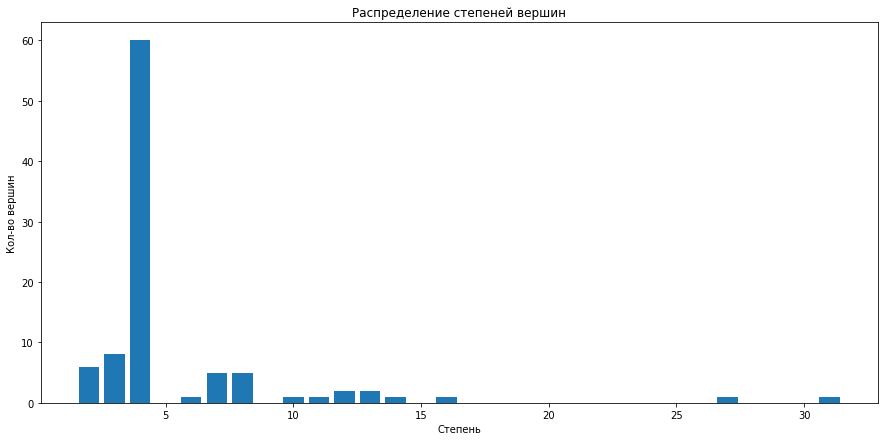

In [30]:
plt.figure(1, figsize=(15, 7))
plt.title('Распределение степеней вершин')
plt.ylabel('Кол-во вершин')
plt.xlabel('Степень')
plt.bar(x, y)
plt.show()

Аппроксимирующая прямая

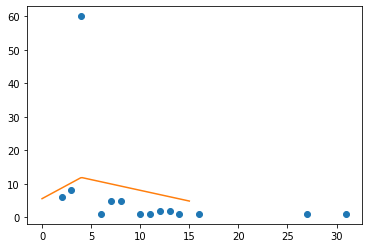

In [60]:
from scipy import optimize

def piecewise_linear(x, x0, y0, k1, k2):
    return np.piecewise(x, [x < x0], [lambda x:k1*x + y0-k1*x0, lambda x:k2*x + y0-k2*x0])

p , e = optimize.curve_fit(piecewise_linear, x, y)
xd = np.linspace(0, 15, 100)
plt.plot(x, y, "o")
plt.plot(xd, piecewise_linear(xd, *p))

Log-log scale для этих значений

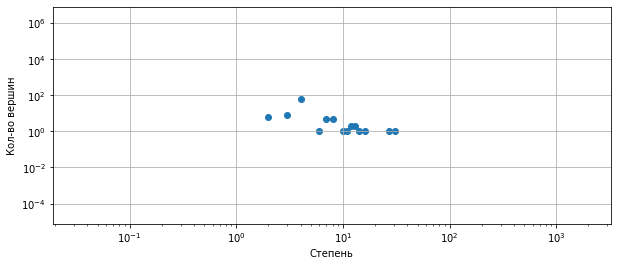

In [73]:
_, ax = plt.subplots(figsize=(10,4))
#ax.plot(x, y, color='#539caf', alpha=1)
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xticks(x)
ax.set_yticks(y)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Кол-во вершин')
plt.xlabel('Степень')
plt.scatter(x, y)
plt.grid(True)
plt.show()

Визуализация графа, на котором размер вершины зависит от показателя центральности

In [253]:
deg = nx.degree_centrality(G)
i = 0
dgg = {}
for nodeid in sorted(deg, key=deg.get, reverse=True):
    dgg[nodeid] = deg[nodeid] * 705000

In [254]:
dgg

{'the': 232499.99999999997,
 'of': 202499.99999999997,
 'election': 120000.0,
 'and': 105000.0,
 'said': 97500.0,
 'in': 97500.0,
 'that': 90000.0,
 'which': 90000.0,
 'jury': 82500.0,
 'was': 75000.0,
 'primary': 60000.0,
 'irregularities': 60000.0,
 'term': 60000.0,
 'had': 60000.0,
 'by': 60000.0,
 'The': 52500.0,
 'Fulton': 52500.0,
 'Atlanta': 52500.0,
 's': 52500.0,
 'reports': 52500.0,
 'City': 45000.0,
 'County': 30000.0,
 'Grand': 30000.0,
 'Jury': 30000.0,
 'Friday': 30000.0,
 'an': 30000.0,
 'investigation': 30000.0,
 'recent': 30000.0,
 'produced': 30000.0,
 'no': 30000.0,
 'evidence': 30000.0,
 'any': 30000.0,
 'further': 30000.0,
 'end': 30000.0,
 'presentments': 30000.0,
 'Executive': 30000.0,
 'Committee': 30000.0,
 'over': 30000.0,
 'all': 30000.0,
 'charge': 30000.0,
 'praise': 30000.0,
 'thanks': 30000.0,
 'for': 30000.0,
 'manner': 30000.0,
 'October': 30000.0,
 'been': 30000.0,
 'charged': 30000.0,
 'Superior': 30000.0,
 'Court': 30000.0,
 'Judge': 30000.0,
 'Durwo

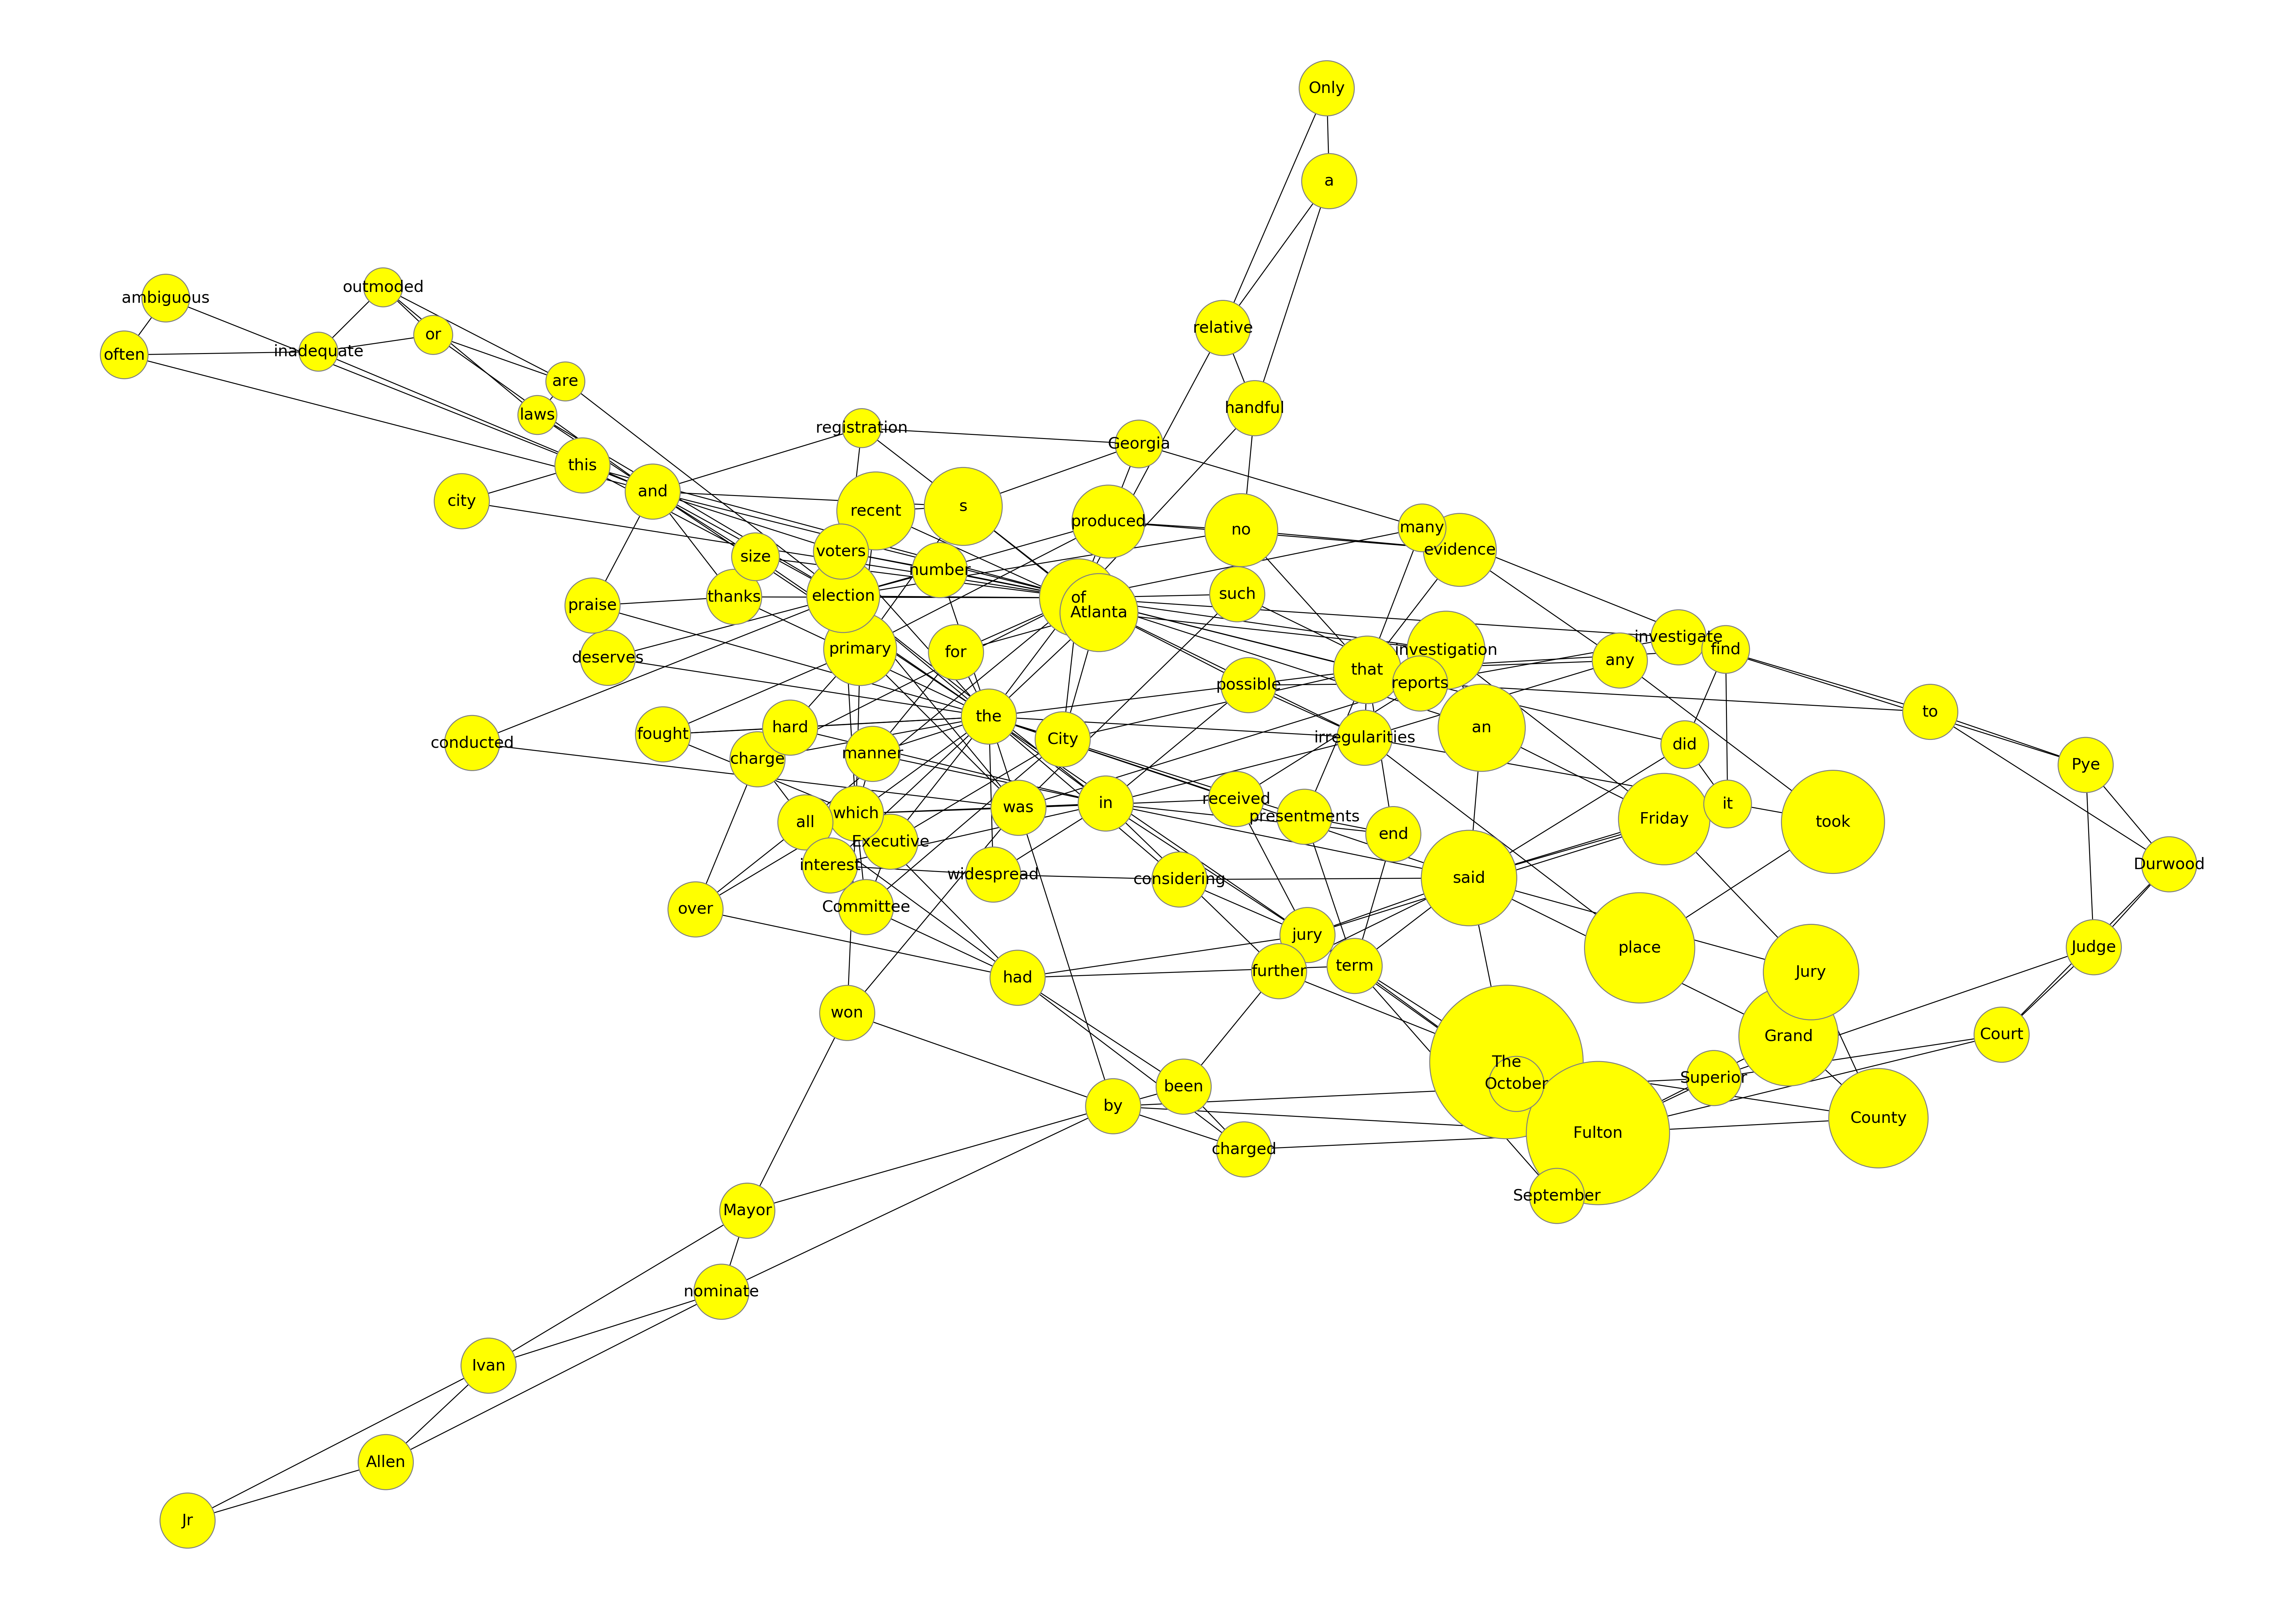

In [255]:
pos = nx.spring_layout(G)
plt.figure(figsize=(100,70))

options = {
    "font_size": 50,
    "node_size": list(dgg.values()),
    "node_color": "yellow",
    "edgecolors": "grey",
    "linewidths": 3,
    "width": 3,
    "with_labels": True  
}
nx.draw(G, pos, **options)
plt.show()

In [183]:
from networkx.algorithms.community.centrality import girvan_newman
comp = girvan_newman(G)
res = {i:words for i, words in enumerate(tuple(sorted(c) for c in next(comp)))}
res

{0: ['Atlanta',
  'City',
  'Committee',
  'County',
  'Executive',
  'Friday',
  'Georgia',
  'Grand',
  'Jury',
  'October',
  'Only',
  'September',
  'The',
  'a',
  'all',
  'ambiguous',
  'an',
  'and',
  'any',
  'are',
  'been',
  'charge',
  'city',
  'conducted',
  'considering',
  'deserves',
  'did',
  'election',
  'end',
  'evidence',
  'find',
  'for',
  'fought',
  'further',
  'had',
  'handful',
  'hard',
  'in',
  'inadequate',
  'interest',
  'investigation',
  'irregularities',
  'it',
  'jury',
  'laws',
  'manner',
  'many',
  'no',
  'number',
  'of',
  'often',
  'or',
  'outmoded',
  'over',
  'place',
  'possible',
  'praise',
  'presentments',
  'primary',
  'produced',
  'received',
  'recent',
  'registration',
  'relative',
  'reports',
  's',
  'said',
  'size',
  'such',
  'term',
  'thanks',
  'that',
  'the',
  'this',
  'took',
  'voters',
  'was',
  'which',
  'widespread'],
 1: ['Allen',
  'Court',
  'Durwood',
  'Fulton',
  'Ivan',
  'Jr',
  'Judg

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


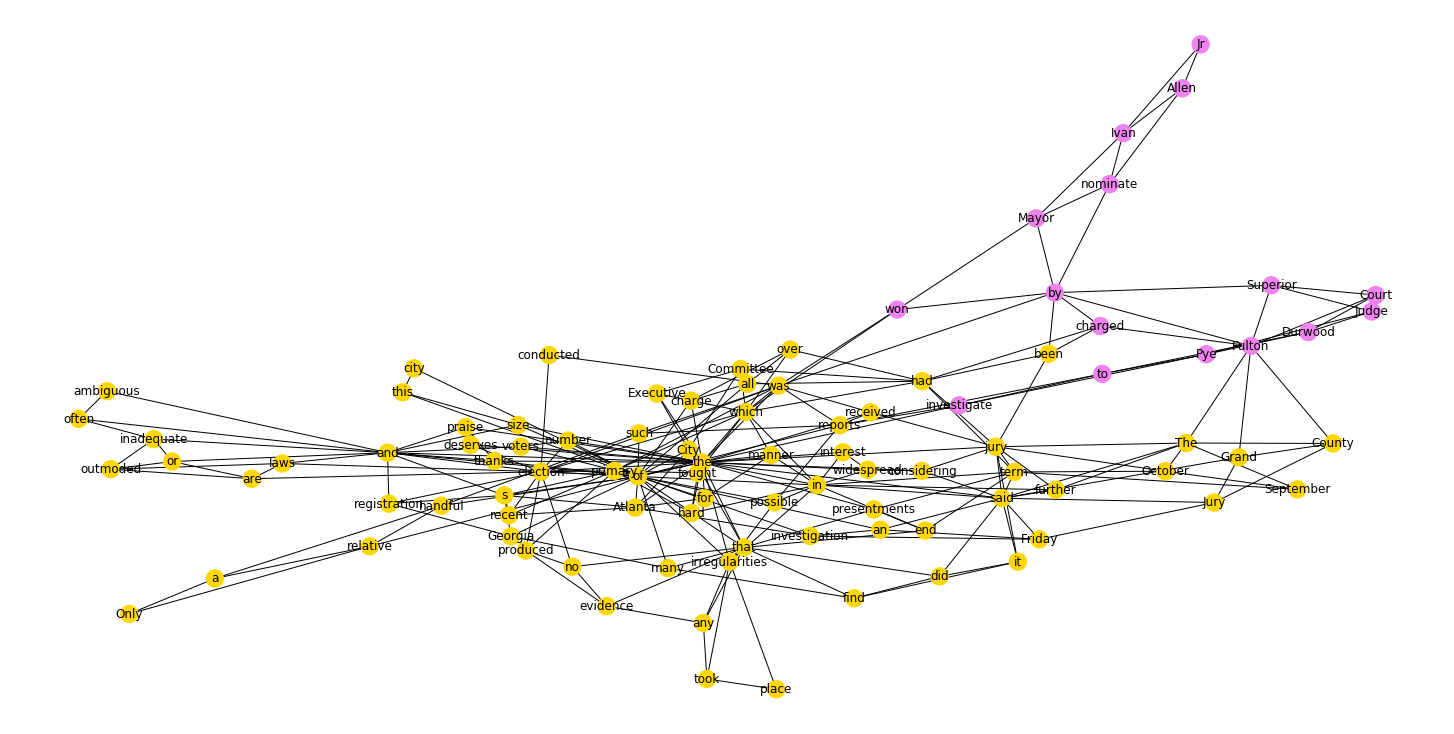

In [185]:
subset_color = [
    "gold",
    "violet",
    "limegreen",
    "darkorange"]
color = [ ]
for v in G.nodes():
    for i, words in res.items():
        if v in words:
            color.append(subset_color[i])
plt.figure(figsize=(20, 10))

nx.draw(G, pos, node_color=color, with_labels=True)
plt.show()

In [256]:
import itertools
k = 2
# Посмотрим чуть глубже: 2 означает еще две итерации деления на сообщества  
for communities in itertools.islice(comp, k):
    print({indx: words for indx, words in enumerate(tuple(sorted(c) for c in communities))})

{0: ['Atlanta', 'City', 'Committee', 'County', 'Executive', 'Friday', 'Georgia', 'Grand', 'Jury', 'October', 'September', 'The', 'all', 'ambiguous', 'an', 'and', 'any', 'are', 'been', 'charge', 'city', 'conducted', 'considering', 'deserves', 'did', 'election', 'end', 'evidence', 'find', 'for', 'fought', 'further', 'had', 'hard', 'in', 'inadequate', 'interest', 'investigation', 'irregularities', 'it', 'jury', 'laws', 'manner', 'many', 'no', 'number', 'of', 'often', 'or', 'outmoded', 'over', 'place', 'possible', 'praise', 'presentments', 'primary', 'produced', 'received', 'recent', 'registration', 'reports', 's', 'said', 'size', 'such', 'term', 'thanks', 'that', 'the', 'this', 'took', 'voters', 'was', 'which', 'widespread'], 1: ['Allen', 'Court', 'Durwood', 'Fulton', 'Ivan', 'Jr', 'Judge', 'Mayor', 'Pye', 'Superior', 'by', 'charged', 'investigate', 'nominate', 'to', 'won'], 2: ['Only', 'a', 'handful', 'relative']}
{0: ['County', 'Friday', 'Grand', 'Jury', 'October', 'September', 'The', '